In [1]:
import networkx as nx

G = nx.Graph()

In [2]:
G.add_node(1)

G.add_nodes_from([2,3])

G.add_nodes_from(["u","v"])

G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [3]:
G.add_edge(1,2)

G.add_edge("u","v")

G.add_edges_from([(1,3),(1,4),(1,5),(1,6)])

G.add_edge("u","w")

G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [4]:
G.remove_node(2)
G.nodes()

NodeView((1, 3, 'u', 'v', 4, 5, 6, 'w'))

In [5]:
G.remove_nodes_from([4,5])
G.nodes()

NodeView((1, 3, 'u', 'v', 6, 'w'))

In [6]:
G.remove_edge(1,3)
G.edges()

EdgeView([(1, 6), ('u', 'v'), ('u', 'w')])

In [7]:
G.remove_edges_from([(1,2),("u","v")])
G.edges()

EdgeView([(1, 6), ('u', 'w')])

In [8]:
G.number_of_nodes()

6

In [9]:
G.number_of_edges()

2

In [10]:
#import networkx as nx
#G = nx.Graph()
#G.add_nodes_from(1,2,3,4)
#G.add_edges_from((1,2),(3,4))
#G.number_of_nodes(), G.number_of_edges()

In [11]:
import matplotlib.pyplot as plt

G = nx.karate_club_graph()

nx.draw(G,with_labels=True,node_color="lightblue",edgecolor="gray")
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


<Figure size 640x480 with 1 Axes>

In [12]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [13]:
G.degree()[33]

17

In [14]:
G.degree(33)

17

In [15]:
G.number_of_nodes()

34

In [16]:
G.number_of_edges()

78

In [17]:
G.degree(0) is G.degree()[0]

True

In [18]:
from scipy.stats import bernoulli

print(bernoulli.rvs(p=0.2))
print(bernoulli.rvs(p=0.2))
print(bernoulli.rvs(p=0.2))
print(bernoulli.rvs(p=0.2))
print(bernoulli.rvs(p=0.2))
print(bernoulli.rvs(p=0.2))
print(bernoulli.rvs(p=0.2))
print(bernoulli.rvs(p=0.2))
print(bernoulli.rvs(p=0.2))
print(bernoulli.rvs(p=0.2))

0
0
0
1
1
0
0
1
0
0


In [19]:
N=20
p=0.2

G = nx.Graph()
G.add_nodes_from(range(N))

for node1 in G.nodes():
    for node2 in G.nodes():
        if bernoulli.rvs(p=p):
            G.add_edge(node1,node2)

In [20]:
G.number_of_nodes()

20

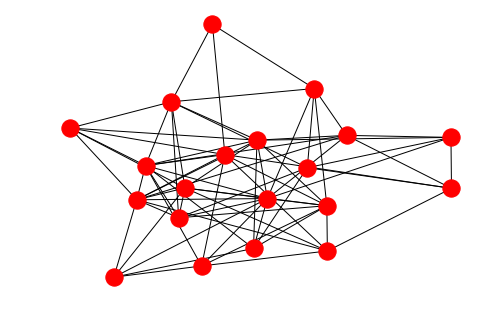

In [21]:
nx.draw(G)

In [22]:
def er_graph(N,p):
    G = nx.Graph()
    G.add_nodes_from(range(N))

    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1,node2)
                
    return G

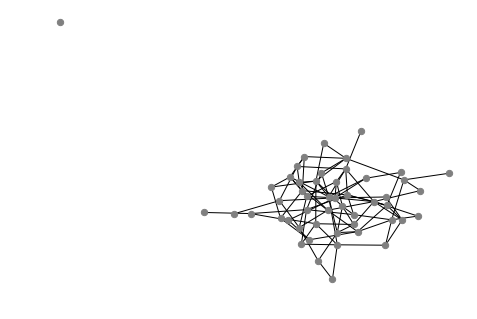

In [23]:
nx.draw(er_graph(50,0.08),node_size=40,node_color='gray')

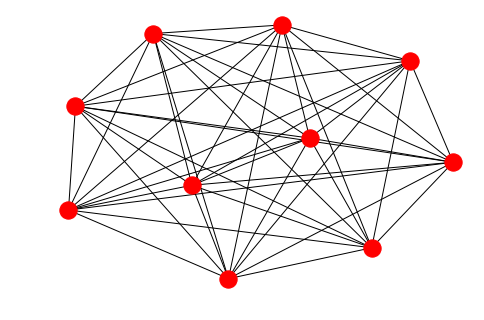

In [24]:
N=10
p=1

X = nx.erdos_renyi_graph(N,p)
nx.draw(X)

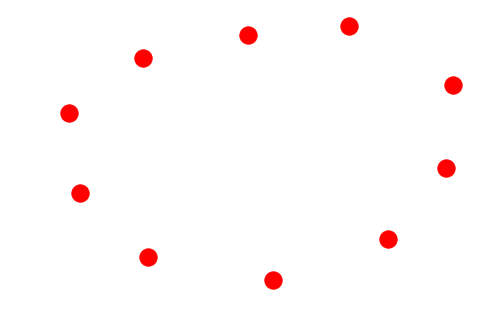

In [25]:
N=10
p=0

X = nx.erdos_renyi_graph(N,p)
nx.draw(X)

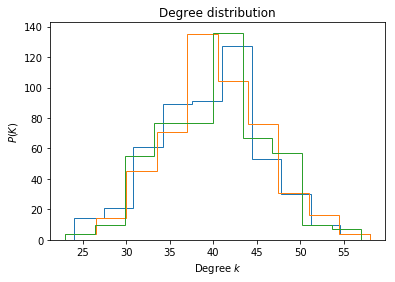

In [26]:
def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(K)$")
    plt.title("Degree distribution")
    
G1 = er_graph(500,0.08)
plot_degree_distribution(G1)
G2 = er_graph(500,0.08)
plot_degree_distribution(G2)
G3 = er_graph(500,0.08)
plot_degree_distribution(G3)
plt.show()

In [27]:
#D = {1:1, 2:2, 3:3}
#plt.hist(D)
#Error

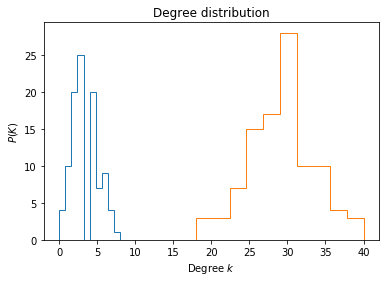

In [28]:
W = nx.erdos_renyi_graph(100, 0.03)
plot_degree_distribution(W)
Z = nx.erdos_renyi_graph(100, 0.30)
plot_degree_distribution(Z)
plt.show()

In [29]:
import numpy as np

A1= np.loadtxt("adj_allVillageRelationships_vilno_1.csv",delimiter=",")
A2= np.loadtxt("adj_allVillageRelationships_vilno_2.csv",delimiter=",")

G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

In [30]:
def basic_netstat(G):
    print("Number of nodes: %d" % G.number_of_nodes())
    print("Number of edges: %d" % G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))

In [31]:
basic_netstat(G1)
basic_netstat(G2)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.08
Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


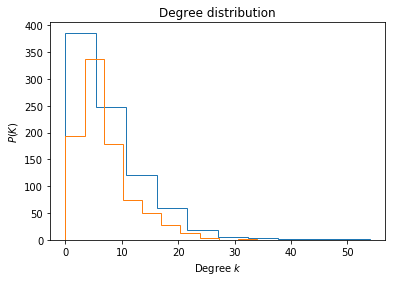

In [32]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.show()

In [35]:
gen = nx.connected_component_subgraphs(G1)
g = gen.__next__()
type(g)
g.number_of_nodes()
len(gen.__next__())

3

In [36]:
len(G1)

843

In [37]:
G1_LLC = max(nx.connected_component_subgraphs(G1),key=len)
G2_LLC = max(nx.connected_component_subgraphs(G2),key=len)

In [38]:
len(G1_LLC)

825

In [39]:
G1_LLC.number_of_nodes()

825

In [40]:
len(G2_LLC)

810

In [41]:
G1_LLC.number_of_nodes() / G1.number_of_nodes()

0.9786476868327402

In [42]:
G2_LLC.number_of_nodes() / G2.number_of_nodes()

0.9236031927023945

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


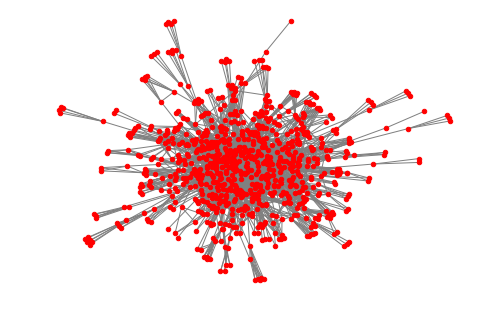

In [43]:
plt.figure()
nx.draw(G1_LLC,node_color="red",edge_color="gray",node_size=20)
plt.show()

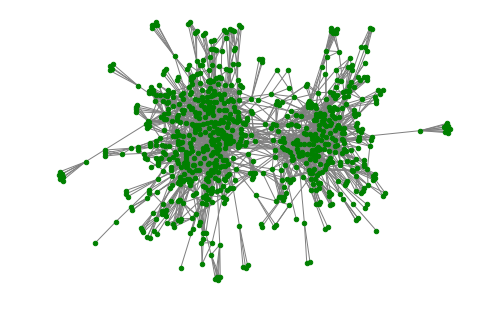

In [45]:
plt.figure()
nx.draw(G2_LLC,node_color="green",edge_color="gray",node_size=20)
plt.show()